Chapter 11 Mathematical Tools


In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x)+0.5*x

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)

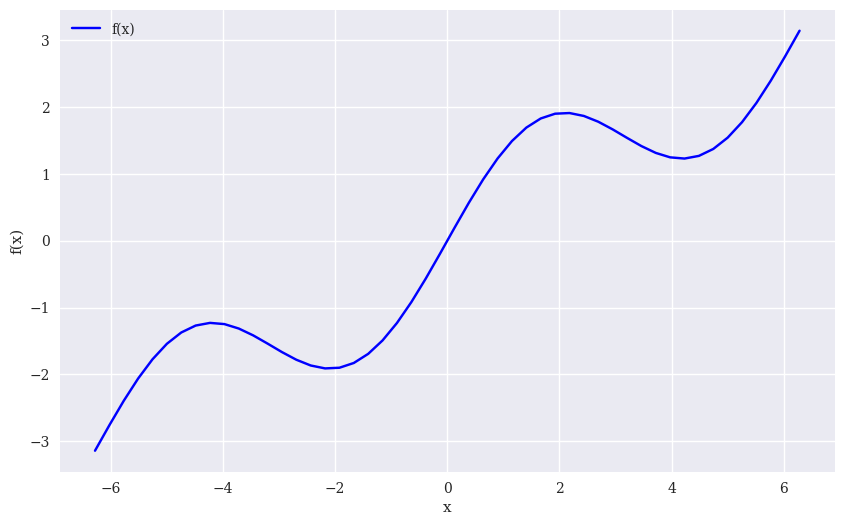

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

Figure 11-1 Example function plot

In [7]:
res = np.polyfit(x, f(x), deg=1, full=True) # linear regression step


In [8]:
res
# full results: regression parameters, residuals, effective rank, singular values, and relative condition number.

(array([ 4.28841952e-01, -5.49532361e-17]),
 array([21.03238686]),
 np.int32(2),
 array([1., 1.]),
 np.float64(1.1102230246251565e-14))

In [9]:
ry = np.polyval(res[0], x)
# evaluation using the regression parameters

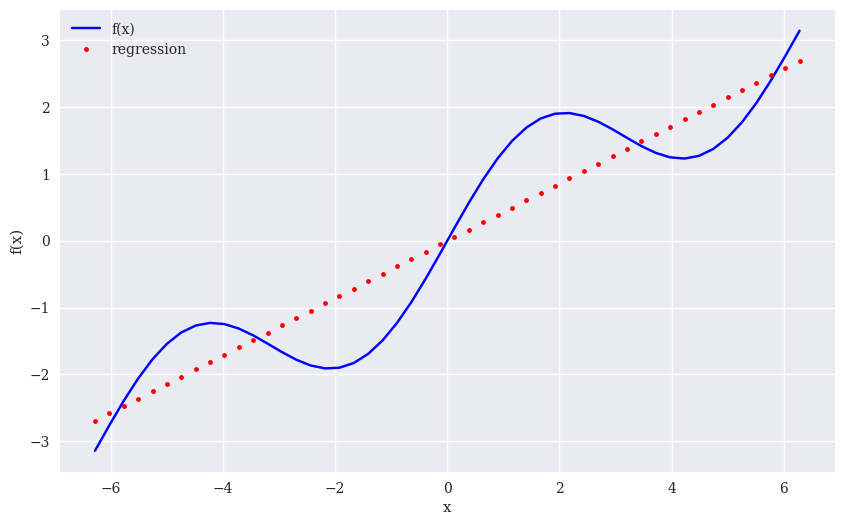

In [10]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

In [11]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

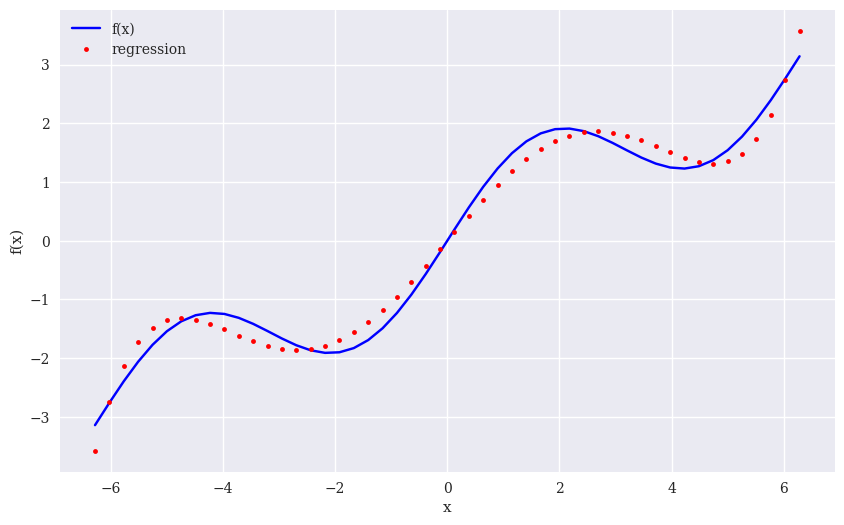

In [12]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-3. Regression with monomials up to order 5

In [13]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [14]:
np.allclose(f(x),ry) # Checks whether the function and regression values are the same (or at least close)

False

In [15]:
np.mean((f(x)-ry)**2) # calculates the mean squared error(MSE) for the regression values given the function values

np.float64(0.00177691347595176)

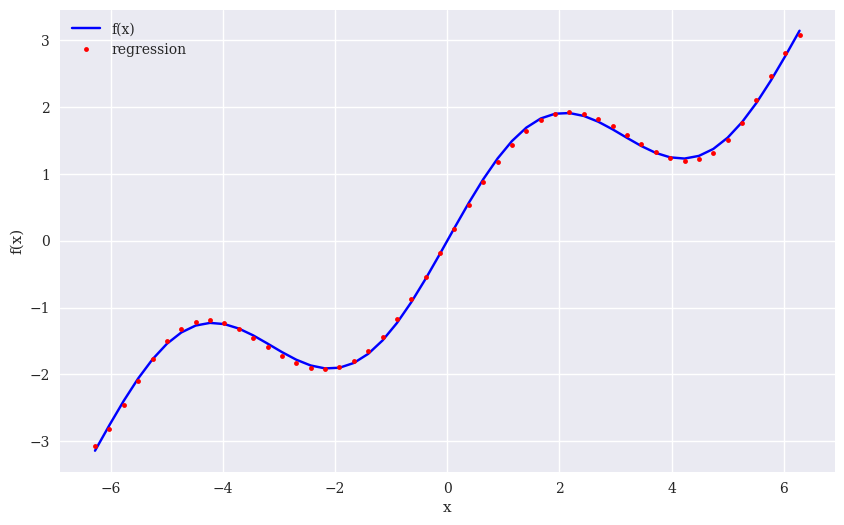

In [16]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-4. Regression with monomials up to order 7

In [17]:
matrix = np.zeros((3+1, len(x)))
matrix[3,:] = x**3
matrix[2,:] = x**2
matrix[1,:] = x
matrix[0,:] = 1

In [18]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0] # regression step

In [19]:
reg.round(4) # optimal regressio parameters

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [20]:
ry = np.dot(reg, matrix) # regression estimates for the function values.

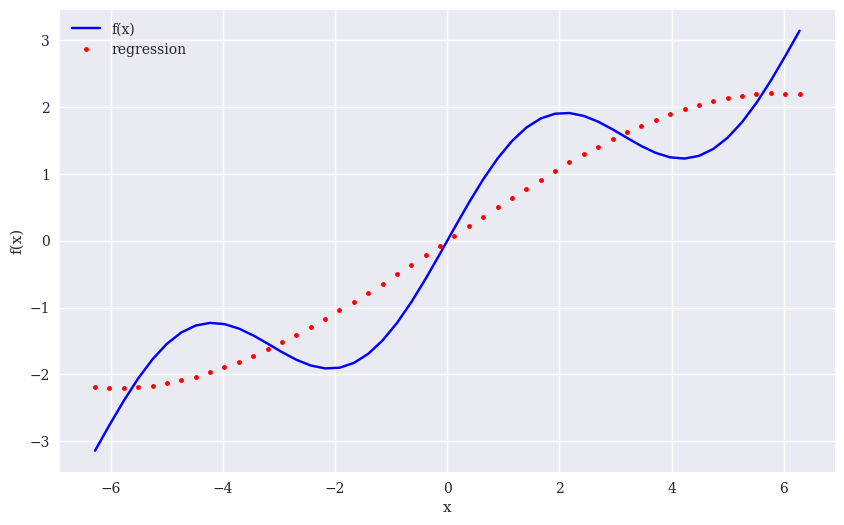

In [21]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-5. Regression with individual basis functions

In [22]:
matrix[3,:] = np.sin(x)

In [23]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [24]:
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [25]:
ry = np.dot(reg, matrix)

In [26]:
np.allclose(f(x), ry)

True

In [27]:
np.mean((f(x) - ry )**2)

np.float64(9.01766622280769e-31)

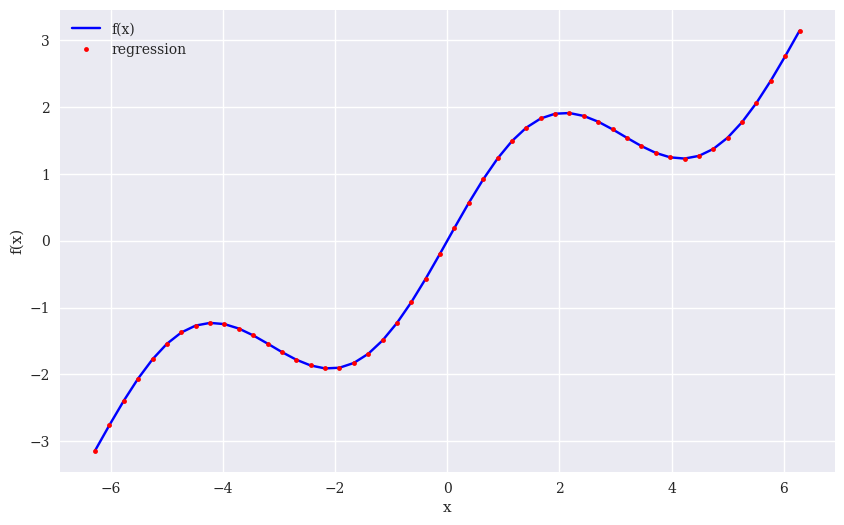

In [28]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-6. Regression with the sine basis function

In [29]:
xn = np.linspace(-2*np.pi, 2*np.pi, 50)
xn = xn +0.15*np.random.standard_normal(len(xn))
yn = f(xn) +0.25*np.random.standard_normal(len(xn))

In [30]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

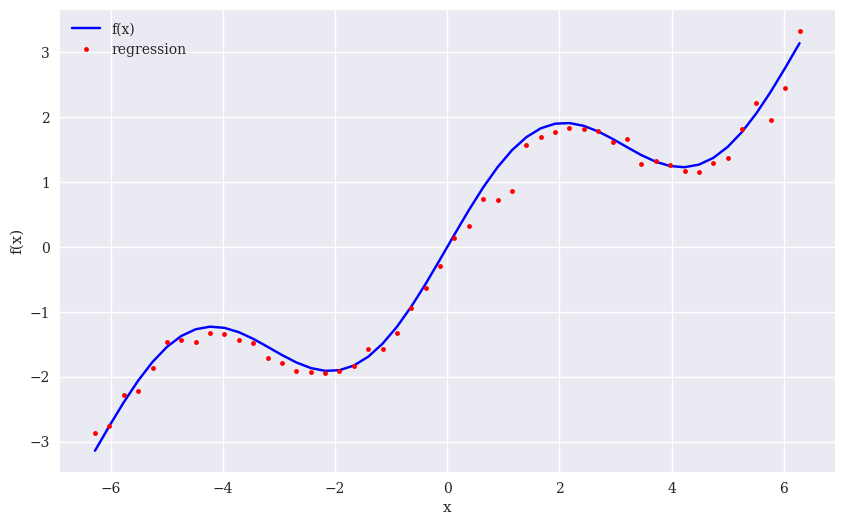

In [31]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-7. Regression for noisy data

In [32]:
xu = np.random.rand(50)*4*np.pi -2*np.pi # randomize x value
yu = f(xu)

In [33]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 1.33 -3.03  2.79 -4.21 -1.42 -4.15 -3.71 -5.62 -3.33  4.93]
[ 1.64 -1.63  1.74 -1.23 -1.7  -1.23 -1.32 -2.2  -1.48  1.49]


In [34]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

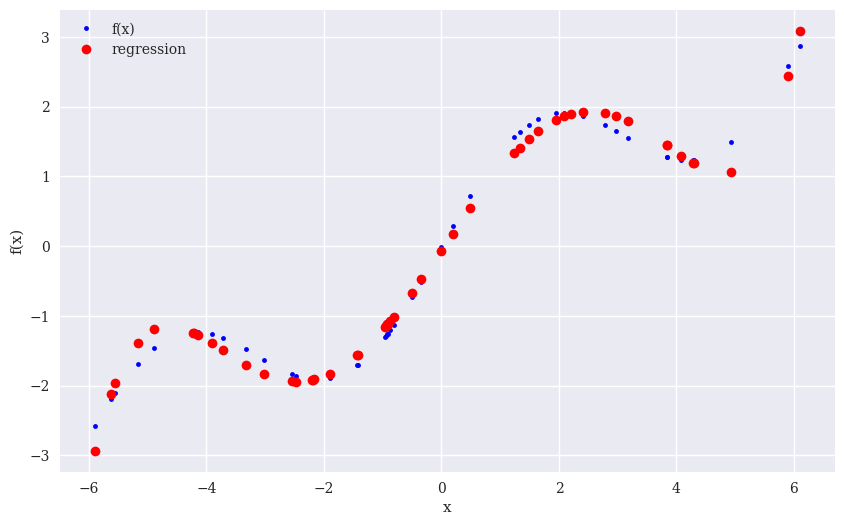

In [35]:
create_plot([xu,xu], [yu, ry], ['b.', 'ro'], ['f(x)', 'regression'],['x','f(x)'])

Figure 11-8. Regressio nfro unsorted data.

In [36]:
def fm(p):
    x, y =p
    return np.sin(x) +0.25*x + np.sqrt(y)+0.05*y**2

In [37]:
x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X,Y = np.meshgrid(x,y)

In [38]:
Z = fm((X,Y))
x=X.flatten()
y=Y.flatten()

In [39]:
from mpl_toolkits.mplot3d import Axes3D

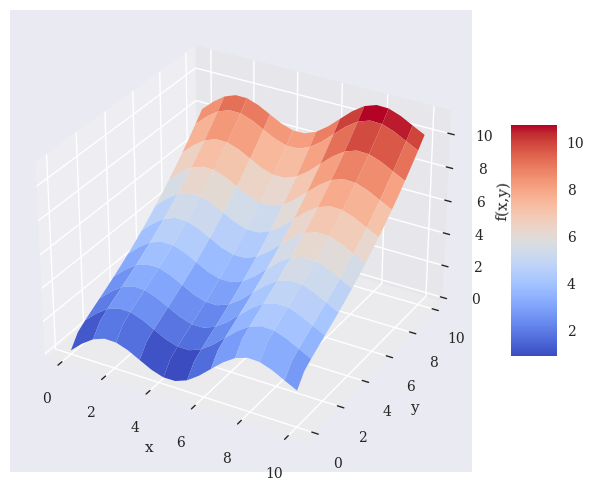

In [40]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [41]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [42]:
reg = np.linalg.lstsq(matrix, fm(((x,y))), rcond=None)[0]

In [43]:
RZ = np.dot(matrix, reg).reshape((20,20))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12716\257621701.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 3 Axes> than <Figure size 1000x600 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(surf, shrink=0.5, aspect=5)


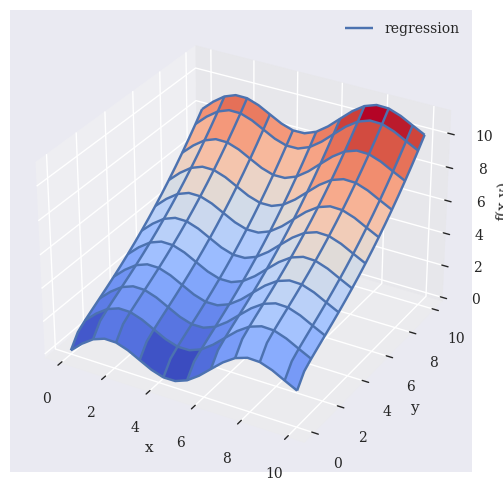

In [44]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2= ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

Figure 11-10. Regression surface for function with two parameters

In [45]:
import scipy.interpolate as spi

In [46]:
x = np.linspace(-2*np.pi, 2*np.pi, 25)

In [47]:
def f(x):
    return np.sin(x)+0.5*x

In [48]:
ipo = spi.splrep(x, f(x), k=1)

In [49]:
iy = spi.splev(x, ipo)

In [50]:
np.allclose(f(x), iy)

True

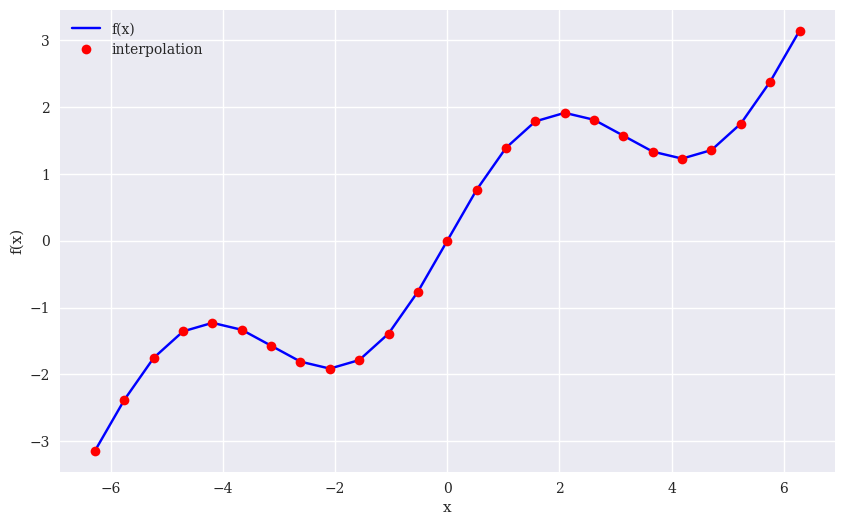

In [51]:
create_plot([x,x],[f(x),iy],['b','ro'],['f(x)', 'interpolation'], ['x', 'f(x)'])

Figure 11-11. L?inear splines interpolation (complete data set)

In [52]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

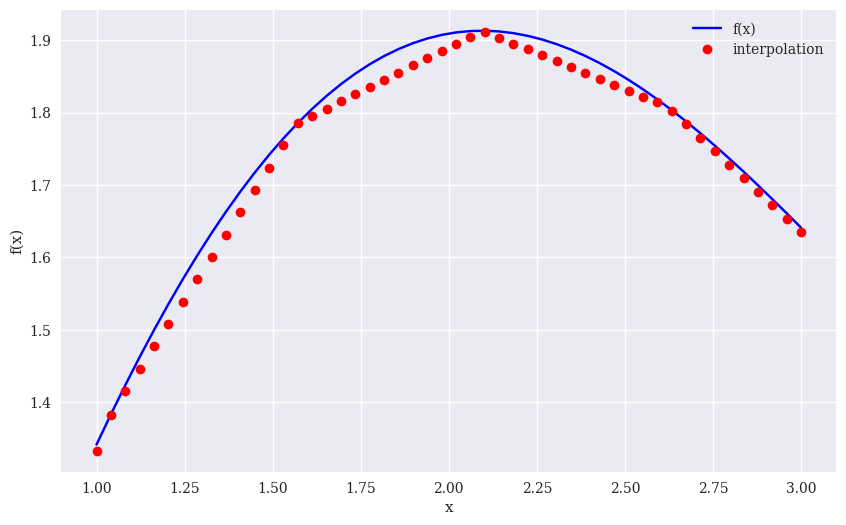

In [53]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
['f(x)', 'interpolation'], ['x', 'f(x)'])

Figure 11-12. Linear splines interpolation (data subset)

In [54]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

In [55]:
np.allclose(f(xd), iyd)

False

In [56]:
np.mean((f(xd) - iyd) ** 2)

np.float64(1.1349319851436252e-08)

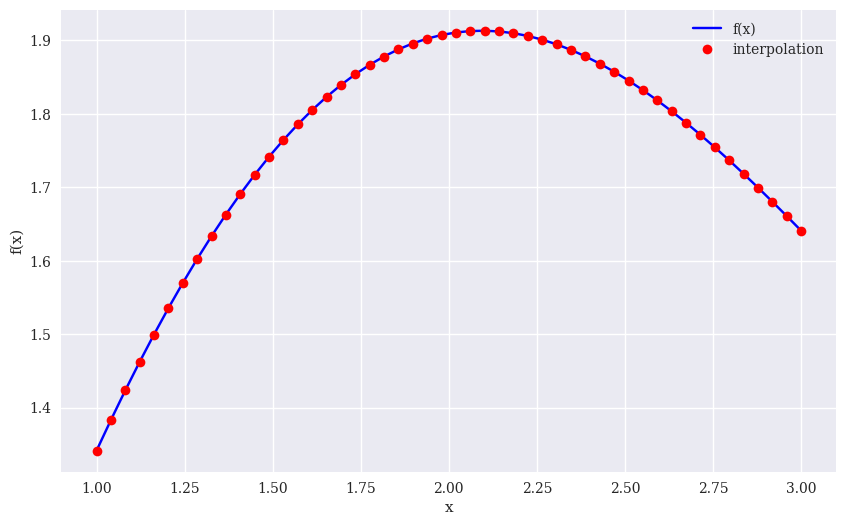

In [57]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
['f(x)', 'interpolation'], ['x', 'f(x)'])

Figure 11-13. Cubic splines interpolation (data subset)

In [58]:
def fm(p):
    x,y=p
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)

In [59]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

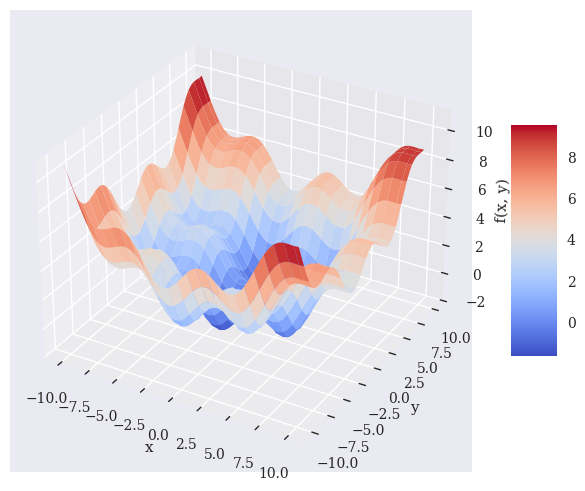

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
cmap='coolwarm', linewidth=0.5,
antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

Figure 11-14. Linear splines interpolation (data subset)

In [61]:
import scipy.optimize as sco

In [62]:
def fo(p):
    x,y=p
    z = np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
    if output == True:
        print('%8.4f|%8.4f|%8.4f' % (x,y,z))
    return z

In [63]:
output = True
sco.brute(fo,((-10,10.1, 5), (-10,10.1, 5)), finish=None)

-10.0000|-10.0000| 11.0880
-10.0000| -5.0000|  7.7529
-10.0000|  0.0000|  5.5440
-10.0000|  5.0000|  5.8351
-10.0000| 10.0000| 10.0000
 -5.0000|-10.0000|  7.7529
 -5.0000| -5.0000|  4.4178
 -5.0000|  0.0000|  2.2089
 -5.0000|  5.0000|  2.5000
 -5.0000| 10.0000|  6.6649
  0.0000|-10.0000|  5.5440
  0.0000| -5.0000|  2.2089
  0.0000|  0.0000|  0.0000
  0.0000|  5.0000|  0.2911
  0.0000| 10.0000|  4.4560
  5.0000|-10.0000|  5.8351
  5.0000| -5.0000|  2.5000
  5.0000|  0.0000|  0.2911
  5.0000|  5.0000|  0.5822
  5.0000| 10.0000|  4.7471
 10.0000|-10.0000| 10.0000
 10.0000| -5.0000|  6.6649
 10.0000|  0.0000|  4.4560
 10.0000|  5.0000|  4.7471
 10.0000| 10.0000|  8.9120


array([0., 0.])

In [64]:
output = False
opt1 = sco.brute(fo,((-10,10.1, 0.1), (-10,10.1, 0.1)), finish=None)

In [65]:
opt1

array([-1.4, -1.4])

In [66]:
fm(opt1)

np.float64(-1.7748994599769203)

In [67]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)

 -1.4000| -1.4000| -1.7749
 -1.4700| -1.4000| -1.7743
 -1.4000| -1.4700| -1.7743
 -1.3300| -1.4700| -1.7696
 -1.4350| -1.4175| -1.7756
 -1.4350| -1.3475| -1.7722
 -1.4088| -1.4394| -1.7755
 -1.4438| -1.4569| -1.7751
 -1.4328| -1.4427| -1.7756
 -1.4591| -1.4208| -1.7752
 -1.4213| -1.4347| -1.7757
 -1.4235| -1.4096| -1.7755
 -1.4305| -1.4344| -1.7757
 -1.4168| -1.4516| -1.7753
 -1.4305| -1.4260| -1.7757
 -1.4396| -1.4257| -1.7756
 -1.4259| -1.4325| -1.7757
 -1.4259| -1.4241| -1.7757
 -1.4304| -1.4177| -1.7757
 -1.4270| -1.4288| -1.7757


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12716\3659952806.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)


In [68]:
opt2

array([-1.42702972, -1.42876755])

In [69]:
fm(opt2)

np.float64(-1.7757246992239009)

In [70]:
output= False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [71]:
import math

In [ ]:
def Eu(p):
    s, b =p
    return -(0.5*math.sqrt(s*15+b*5)+(0.5*math.sqrt(s*5+b*12)))

#The function to be minimized, in order to maximize the expected utility

In [ ]:
cons = ({'type':'ineq', 'fun': lambda p:100 - p[0]*10 -p[1]*10})
#The inequality constraint as a dict object.

In [ ]:
bnds =((0,1000), (0,1000))
#The boundary values for the parameters (chosen to be wide enough).

In [ ]:
result = sco.minimize(Eu, [5,5], method='SLSQP', bounds=bnds, constraints=cons)
#The constrained optimization.

In [77]:
result

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -9.700883611455293
           x: [ 8.025e+00  1.975e+00]
         nit: 5
         jac: [-4.851e-01 -4.849e-01]
        nfev: 16
        njev: 5
 multipliers: [ 4.850e-02]

In [ ]:
result['x']
#The optimal parameter values (i.e., the optimal portfolio).

array([8.02547726, 1.97452274])

In [ ]:
-result['fun']
#The negative minimum function value as the optimal solution value.

9.700883611455293

In [ ]:
np.dot(result['x'],[10,10])
#The budget constraint is binding; all wealth is invested.

np.float64(100.0)

In [81]:
import scipy.integrate as sci

In [82]:
def f(x):
    return np.sin(x)+0.5*x

In [83]:
x = np.linspace(0,10)
y = f(x)
a= 0.5
b= 9.5
Ix = np.linspace(a, b)
Iy = f(Ix)

In [85]:
from matplotlib.patches import Polygon

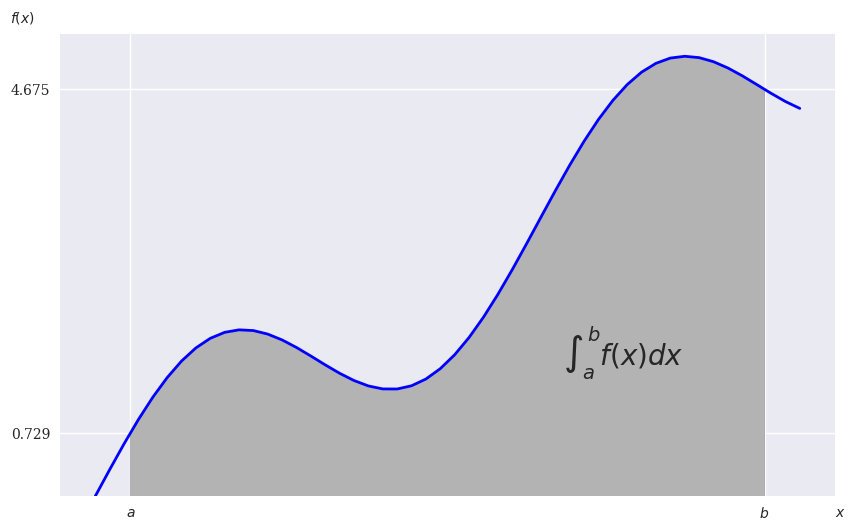

In [86]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x,y,'b',linewidth = 2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);


Figure 11-15. Integral value as shaded area

In [87]:
sci.fixed_quad(f,a,b)[0]

np.float64(24.366995967084602)

In [88]:
sci.quad(f,a,b)[0]

24.374754718086752

In [100]:
# sci.romberg(f,a,b)
# romberg method is depreciated new version of scipy

In [93]:
xi = np.linspace(0.5, 9.5, 25)

In [97]:
sci.trapezoid(f(xi), xi)

np.float64(24.352733271544516)

In [96]:
sci.simpson(f(xi), xi)

np.float64(24.37496418455075)

In [101]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


In [104]:
!pip install sympy

In [105]:
import sympy as sy

In [106]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [107]:
type(x)

sympy.core.symbol.Symbol

In [108]:
sy.sqrt(x)

sqrt(x)

In [109]:
3+sy.sqrt(x)-4**2

sqrt(x) - 13

In [111]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2 

In [112]:
sy.simplify(f)

1.5*x**2 + 4.5

In [113]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [114]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [115]:
print(sy.pretty(sy.sqrt(x)+0.5))

  ___      
\/ x  + 0.5


In [ ]:
%time pi_str = str(sy.N(sy.pi, 400000))
# Returns the string representation of the first 400,000 digits of π.

CPU times: total: 2.09 s
Wall time: 2.13 s


In [ ]:
pi_str[:42]
# Shows the first 40 digits …

'3.1415926535897932384626433832795028841971'

In [ ]:
pi_str[-40:]
#… and the final 40 digits.

'8245672736856312185020980470362464176199'

In [ ]:
%time pi_str.find('061072') 
#Searches for a birthday date in the string.


CPU times: total: 0 ns
Wall time: 90.8 μs


80847

In [130]:
%time pi_str.find('1024') 


CPU times: total: 0 ns
Wall time: 24.8 μs


12736

In [131]:
sy.solve(x**2-1)

[-1, 1]

In [132]:
sy.solve(x**2-1-3)

[-2, 2]

In [133]:
sy.solve(x**3+0.5*x**2-1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [134]:
sy.solve(x**2+y**2)

[{x: -I*y}, {x: I*y}]

In [136]:
a,b = sy.symbols('a b')

In [137]:
I =sy.Integral(sy.sin(x)+0.5*x, (x,a,b))

In [138]:
print(sy.pretty(I))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [139]:
int_func = sy.integrate(sy.sin(x)+0.5*x, x)

In [140]:
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [141]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [142]:
Fb-Fa

24.3747547180867

In [143]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))

In [ ]:
print(sy.pretty(int_func_limits))
#Solving the integral symbolically.

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [ ]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf() 
#Solving the integral numerically, using a dict object during substitution.

24.3747547180868

In [ ]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))
#Solving the integral numerically in a single step.

24.3747547180867

In [149]:
int_func.diff()

0.5*x + sin(x)

In [150]:
f = (sy.sin(x) + 0.05 * x ** 2
 + sy.sin(y) + 0.05 * y ** 2)

In [151]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [152]:
del_y = sy.diff(f,y)
del_y

0.1*y + cos(y)

In [ ]:
xo = sy.nsolve(del_x, -1.5)
xo
#Educated guesses for the roots and resulting optimal values.

-1.42755177876459

In [ ]:
yo = sy.nsolve(del_y, -1.5)
yo 
#Educated guesses for the roots and resulting optimal values.

-1.42755177876459

In [ ]:
f.subs({x : xo, y : yo}).evalf()
#The global minimum function value.

-1.77572565314742

In [ ]:
xo = sy.nsolve(del_x, 1.5)
#Uneducated guesses for the roots.
xo

1.74632928225285

In [157]:
yo = sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [ ]:
f.subs({x : xo, y : yo}).evalf()
#The local minimum function value.

2.27423381055640